Challenge Chapter 2: Machine Learning</br>
Syafaatul Khayati</br>
(149368779101-598)

# Import Dataset

In [ ]:
# connect to google drive for easier file access
from google.colab import drive
import os

drive.mount('/content/drive',force_remount=True)
PATH = '/content/drive/MyDrive/FGA Batch 4 - DS8/Challenge ch 2 ML'
os.chdir(PATH)

Mounted at /content/drive


In [ ]:
# use this to upload files without connect
# from google.colab import files
# uploaded = files.upload()

In [ ]:
# install necessary library first to import it
!pip install dython

In [ ]:
import numpy as np
import pandas as pd
pd.set_option('display.max_row',None)               # set max rows as needed
pd.set_option('display.max_column',None)            # set max column as needed

import matplotlib.pyplot as plt
from dython.nominal import associations             # used to find relationships between variables where nominal/categorical data are involved

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold # used for model's cross-validation to avoid overfitting
from sklearn.model_selection import GridSearchCV    # for hyperparameter tuning
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.svm import SVC
import xgboost as xgb                               # eXtreme Gradient Boosting (XGBoost) -> enhanced Decision Tree, alternative to Random Forest's bagging method

In [ ]:
df_raw = pd.read_csv('train.csv')
df_raw.head() 

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


In [ ]:
df_raw.columns

Index(['state', 'account_length', 'area_code', 'international_plan',
       'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'churn'],
      dtype='object')

Berdasar cuplikan dataframe dan nama kolom yang diketahui, variabel dataset *customer churn* pada proyek ini dapat digolongkan sebagai berikut:

* Nominal data: state, area_code, international_plan (binary), voice_mail_plan (binary), churn (target variable; binary)

* Ordinal data: -

* Numerical data (discrete): account_length, number_vmail_messages, total_day_calls, total_eve_calls, total_night_calls, total_intl_calls, number_customer_service_calls

* Numerical data (continuous): total_day_minutes, total_day_charge, total_eve_minutes, total_eve_charge, total_night_minutes, total_night_charge, total_intl_minutes, total_intl_charge

# Exploratory Data Analysis (EDA)

## General Data Information

In [ ]:
df_raw.shape        # get numbers of rows and columns

(4250, 20)

In [ ]:
df_raw.info()       # get all columns and data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

Fungsi `.info()` di atas menunjukkan semua kolom memiliki *data type* yang benar, sehingga tidak perlu dilakukan *casting* 

In [ ]:
df_raw.isnull().mean()      # check null values' ratio

state                            0.0
account_length                   0.0
area_code                        0.0
international_plan               0.0
voice_mail_plan                  0.0
number_vmail_messages            0.0
total_day_minutes                0.0
total_day_calls                  0.0
total_day_charge                 0.0
total_eve_minutes                0.0
total_eve_calls                  0.0
total_eve_charge                 0.0
total_night_minutes              0.0
total_night_calls                0.0
total_night_charge               0.0
total_intl_minutes               0.0
total_intl_calls                 0.0
total_intl_charge                0.0
number_customer_service_calls    0.0
churn                            0.0
dtype: float64

Kode di atas mencari `df_raw.isnull().sum()/df_raw.shape[0]` atau `jumlah nilai null/total jumlah nilai keseluruhan`. Terlihat tidak ada *missing values* dalam dataset.

In [ ]:
df_raw[df_raw.duplicated()]           # check for duplicates

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn


Tidak ada baris duplikat dalam dataset, sehingga tiap *data points* memiliki kombinasi variabel yang unik.

## Univariat Numerical Analysis

In [ ]:
# list numerical columns
num_col = ['account_length', 'number_vmail_messages', 'total_day_calls', 'total_eve_calls', 'total_night_calls', 'total_intl_calls', 'number_customer_service_calls', 'total_day_minutes', 'total_day_charge', 'total_eve_minutes', 'total_eve_charge', 'total_night_minutes', 'total_night_charge', 'total_intl_minutes', 'total_intl_charge']

In [ ]:
df_raw[[c for c in df_raw.columns if c in num_col]].describe().applymap('{:,.2f}'.format)           # get statistical summary

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,"4,250.00","4,250.00","4,250.00","4,250.00","4,250.00","4,250.00","4,250.00","4,250.00","4,250.00","4,250.00","4,250.00","4,250.00","4,250.00","4,250.00","4,250.00"
mean,100.24,7.63,180.26,99.91,30.64,200.17,100.18,17.02,200.53,99.84,9.02,10.26,4.43,2.77,1.56
std,39.70,13.44,54.01,19.85,9.18,50.25,19.91,4.27,50.35,20.09,2.27,2.76,2.46,0.75,1.31
min,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,73.00,0.00,143.33,87.00,24.36,165.93,87.00,14.10,167.22,86.00,7.52,8.50,3.00,2.30,1.00
50%,100.00,0.00,180.45,100.00,30.68,200.70,100.00,17.06,200.45,100.00,9.02,10.30,4.00,2.78,1.00
75%,127.00,16.00,216.20,113.00,36.75,233.78,114.00,19.87,234.70,113.00,10.56,12.00,6.00,3.24,2.00
max,243.00,52.00,351.50,165.00,59.76,359.30,170.00,30.54,395.00,175.00,17.77,20.00,20.00,5.40,9.00


Berdasarkan *summary central tendency* dan *measure of spread* di atas, ada beberapa yang langsung terlihat memerlukan perhatian khusus:
- Standar deviasi variabel `account_length` menunjukkan angka hampir 40 bulan (>3 tahun). Std memberikan indikasi seberapa jauh perbedaan lama berlangganan *customer*, sehingga angka tersebut cukup *alarming*
- Nilai minimum, Q1, dan Q2 variabel `number_vmail_messages` sama, yaitu 0. Ini menunjukkan sangat banyak *customer* yang tidak menerima *voice mail*, baik karena memang tidak mendaftar (`voice_mail_plan` bernilai 0) atau mendaftar tapi layanan *voice mail* memang tidak terlalu dibutuhkan.
- Angka untuk jenis panggilan *day call*, *evening call*, dan *night call* hampir mirip, namun *international call* cenderung jauh lebih rendah. Kemungkinan karena tidak semua pelanggan ISP pergi ke luar negeri, sedangkan orang yang berpergian sementara akan menggunakan ISP negara tersebut.

### Account Length

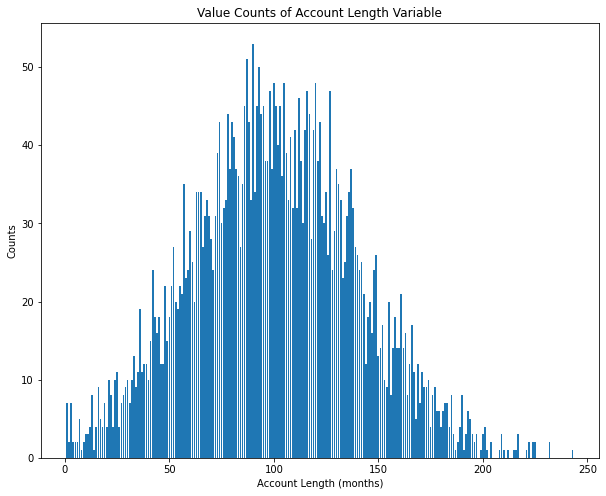

In [ ]:
fig = plt.figure(figsize=(10,8))                                          # configure figure size
plt.bar(x=df_raw['account_length'].value_counts().keys(),                 # configure x axis = unique values of account length
            height=df_raw['account_length'].value_counts().values)        # configure y axis = counts of said unique values
plt.xlabel('Account Length (months)')
plt.ylabel('Counts')
plt.title('Value Counts of Account Length Variable')
plt.show()

*Bar plot* tersebut menunjukkan bahwa mayoritas customers ternyata berlangganan ke layanan ISP ini cukup lama (~100 bulan, 8 tahun). Tingginya nilai standar deviasi pada *summary* sebelumnya kemungkinan besar disebabkan oleh *outlier*/nilai ekstrim yang umur akunnya jauh lebih panjang dari mean. Untuk mengamati *outlier* tersebut, bisa digunakan *boxplot*.

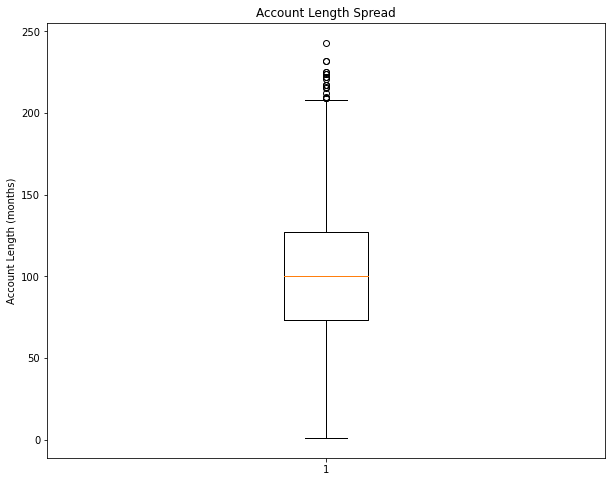

In [ ]:
fig = plt.figure(figsize=(10,8))
plt.boxplot(x=df_raw['account_length'])
plt.ylabel('Account Length (months)')
plt.title('Account Length Spread')
plt.show()

Berdasarkan hasil visualisasi di atas, terlihat bahwa ada beberapa data yang muncul di luar jangkauan *upper whiskers*, yaitu Q3+1.5*IQR. Walaupun hal ini dapat menjadi indikasi awal adanya *outlier*, namun bisa saja data tersebut masih bagian valid dari variabel `account_length` pada dataset ini.

Untuk memperjelas apakah data tersebut *outlier* yang harus ditangani atau bukan, digunakan konsep [*Tukey's Box Plot Method*](https://towardsdatascience.com/detecting-and-treating-outliers-in-python-part-1-4ece5098b755) yang menyebutkan 2 jenis *outliers*, yaitu ***possible outliers*** (antara *inner* dan *outer fence*) dan ***probable outliers*** (di luar *outer fence*; [kemungkinan besar *outlier* sebenarnya](https://www.krisamerikos.com/blog/probability#:~:text=Probable%20means%20that%20there%20is,0%20chance%20of%20it%20happening.)). Metode deteksi *outlier* ini cukup sederhana namun dianggap lebih cocok karena tidak mengasumsikan normalitas sebaran data seperti Z-score atau Grubbs.

Daftar *possible* dan *probable outlier* bisa didapat menggunakan fungsi `get_outliers()` di bawah.

In [ ]:
def get_outliers(df,col):
    q3 = df[col].quantile(0.75)
    q1 = df[col].quantile(0.25)
    iqr = q3 - q1

    # find inner fence (cut-off point of non-suspicious data)
    inner_fence_low = q1 - 1.5*iqr
    inner_fence_up = q3 + 1.5*iqr

    # find outer fence (cut-off point of possible outlier)
    outer_fence_low = q1 - 3*iqr
    outer_fence_up = q3 + 3*iqr

    # if between inner-outer fence then possible, else if outside outer fence then probable
    possible_outliers = df[((outer_fence_low <= df[col]) & (df[col] < inner_fence_low)) | ((outer_fence_up >= df[col]) & (df[col] > inner_fence_up))]
    probable_outliers = df[(df[col] < outer_fence_low) | (df[col] > outer_fence_up)]

    return possible_outliers, probable_outliers

In [ ]:
poss, prob = get_outliers(df_raw,'account_length')

In [ ]:
poss

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
197,WY,215,area_code_510,no,no,0,83.6,148,14.21,120.9,91,10.28,226.6,110,10.20,10.7,9,2.89,0,no
256,SD,209,area_code_415,no,no,0,227.2,128,38.62,258.4,92,21.96,183.5,74,8.26,8.9,4,2.40,3,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3932,VT,217,area_code_510,no,no,0,99.7,74,16.95,183.1,97,15.56,220.3,73,9.91,14.4,4,3.89,0,no
4079,TN,222,area_code_415,no,no,0,256.6,119,43.62,230.8,98,19.62,236.0,97,10.62,12.2,5,3.29,1,yes


In [ ]:
prob

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn


Berdasar uji *outlier* menggunakan *Tukey's box plot* tersebut, terlihat walaupun ada 20 *possible outliers*, tidak ada *probable outliers* dalam dataset tersebut. Karena tidak ada alasan kuat untuk mencurigai kesalahan *input* atau *error* lainnya, maka *possible outliers* tidak perlu dihapus dan diterima sebagai bagian dari dataset.

### Number of Voice Mails

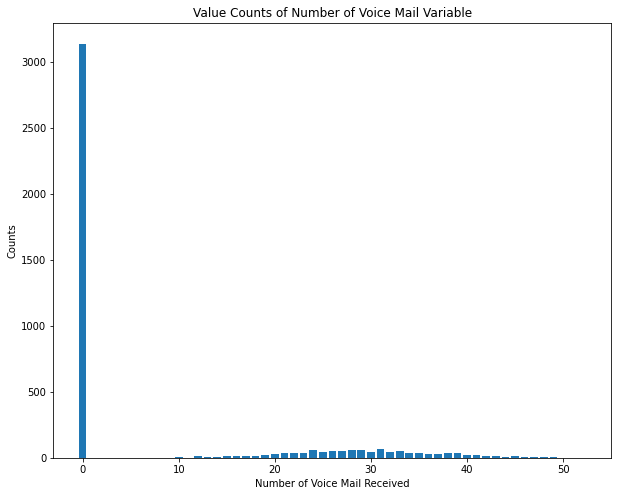

In [ ]:
fig = plt.figure(figsize=(10,8))
plt.bar(x=df_raw['number_vmail_messages'].value_counts().keys(),
            height=df_raw['number_vmail_messages'].value_counts().values)
plt.xlabel('Number of Voice Mail Received')
plt.ylabel('Counts')
plt.title('Value Counts of Number of Voice Mail Variable')
plt.show()

In [ ]:
df_raw[df_raw['number_vmail_messages']==0]['voice_mail_plan'].value_counts()

no     3138
yes       1
Name: voice_mail_plan, dtype: int64

Seperti dugaan awal, ada banyak customer yang memiliki number_vmail_messages=0 dengan 3138 orang di antaranya tidak berlangganan layanan voice mail. Ini berarti number_vmail_messages dan voice_mail_plan bersifat ***colinear***, sehingga harus dipertimbangkan dalam pemilhan model ML. Apakah kolom ini bisa di-drop/tidak bisa diputuskan setelah dilihat nilai korelasinya dengan voice_mail_plan menggunakan Pearson's correlation.

In [ ]:
df_temp = df_raw.loc[:,['number_vmail_messages','voice_mail_plan']]
df_temp['voice_mail_plan'] = df_temp['voice_mail_plan'].apply(lambda x: 0 if x=='no' else 1)
corr_mtx = df_temp.corr()
corr_mtx

,number_vmail_messages,voice_mail_plan
number_vmail_messages,1.000000,0.954014
voice_mail_plan,0.954014,1.000000


Karena nilai korelasinya terlihat sangat tinggi, maka bisa disimpulkan kolom number_vmail_messages bisa di-drop pada proses cleaning.

### Day Calls

Pada dataset, ada 3 variabel yang merepresentasikan aktivitas *day calls* tiap pengguna, yaitu `total_day_minutes`, `total_day_calls`, dan `total_day_charge`. Ke-3 variabel ini memiliki potensi *colinearity* sehingga harus dites korelasinya menggunakan Pearsons untuk mengetahui variabel mana yang bisa di-*drop*.

In [ ]:
df_temp = df_raw.loc[:,['total_day_minutes','total_day_calls', 'total_day_charge']]
corr_mtx = df_temp.corr()
corr_mtx

,total_day_minutes,total_day_calls,total_day_charge
total_day_minutes,1.000000,0.000747,1.000000
total_day_calls,0.000747,1.000000,0.000751
total_day_charge,1.000000,0.000751,1.000000


Hasil tersebut menunjukkan korelasi tinggi antara `total_day_minutes` dan `total_day_charge`, sedangkan `total_day_calls` memiliki korelasi rendah dengan variabel lain. Oleh karena itu dipilih `total_day_charge` sebagai variabel yang akan di-*drop* karena memiliki korelasi yang lebih tinggi dengan `total_day_calls`. 

Visualisasi frekuensi data kedua variabel tersebut bisa dilakukan dengan *bar plot*.

Text(0, 0.5, 'Counts')

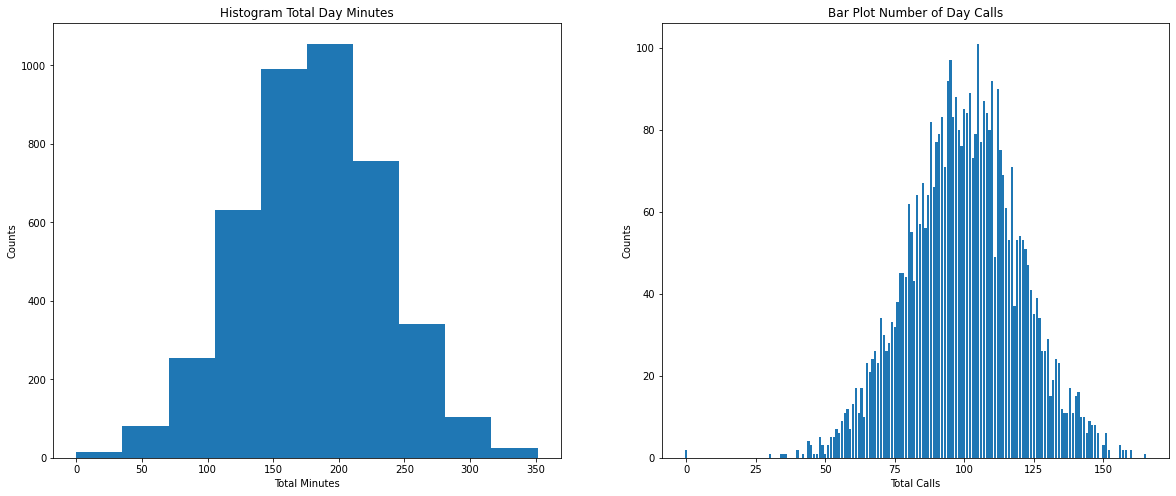

In [ ]:
# create visualization figure for barplot
fig, ax = plt.subplots(ncols=2,figsize=(20,8)) 

# describe each graph
ax[0].hist(x=df_raw['total_day_minutes'])
ax[0].set_title('Histogram Total Day Minutes')
ax[0].set_xlabel('Total Minutes')
ax[0].set_ylabel('Counts')

ax[1].bar(x=df_raw['total_day_calls'].value_counts().keys(),
            height=df_raw['total_day_calls'].value_counts().values)    
ax[1].set_title('Bar Plot Number of Day Calls')
ax[1].set_xlabel('Total Calls')
ax[1].set_ylabel('Counts')

*Bar plot* tersebut menunjukkan bahwa mayoritas pengguna melakukan panggilan di pagi hari sebanyak ~100 kali dengan total durasi ~200 menit. Dataset ini terlihat cukup baik dengan mayoritas data terpusat di sekitar *central tendency*-nya.

Di sini, bisa langsung digunakan fungsi `get_outliers()` untuk melihat *probable outliers* yang bisa di-*drop*.

In [ ]:
poss, prob = get_outliers(df_raw,'total_day_minutes')
prob

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn


In [ ]:
poss, prob = get_outliers(df_raw,'total_day_calls')
prob

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
1138,SD,98,area_code_415,no,no,0,0.0,0,0.0,159.6,130,13.57,167.1,88,7.52,6.8,1,1.84,4,yes
1183,VT,101,area_code_510,no,no,0,0.0,0,0.0,192.1,119,16.33,168.8,95,7.60,7.2,4,1.94,1,no


Berdasarkan hasil yang terlihat di atas, terlihat bahwa `total_day_calls` memiliki 2 *probable outliers* yang memiliki banyak panggilan 0 kali. Setelah mengetahui hal ini, harus dipertimbangkan lagi apa penyebab *outlier* ini terjadi dan apakah data tersebut merupakan [*true outlier* yang harus dipertahankan untuk menghindari bias](https://www.scribbr.com/statistics/outliers/)?

- Data point 1 (index 1138) memiliki variabel *churn* '*yes*' yang menunjukkan berhenti berlangganan. Frekuensi panggilan ke *customer service* pun cukup tinggi, yaitu 4 kali. Sehingga cukup masuk akal apabila *customer* mengurangi/menghentikan penggunaan layanan ISP ini
- Data point 2 (index 1183) memiliki aktivitas *evening*, *night*, dan *international call* yang cukup wajar. Ada kemungkinan *customer* ini memang lebih banyak berinteraksi menggunakan telepon saat malam hari atau di luar negeri.

Berdasarkan pertimbangan tersebut, kita tidak bisa dengan pasti bahwa *outlier* ini disebabkan *measurement error*, *data entry*, atau *unrepresentative sampling* sehingga akan lebih baik bila tidak dihapus.

### Night Calls

In [ ]:
df_temp = df_raw.loc[:,['total_night_minutes','total_night_calls', 'total_night_charge']]
corr_mtx = df_temp.corr()
corr_mtx

,total_night_minutes,total_night_calls,total_night_charge
total_night_minutes,1.000000,0.023815,0.999999
total_night_calls,0.023815,1.000000,0.023798
total_night_charge,0.999999,0.023798,1.000000


Sama dengan aktivitas *day calls* sebelumnya, `total_night_minutes` dan `total_night_charge` memiliki korelasi sangat tinggi, sedangkan korelasi keduanya dengan variabel `total_night_calls` jauh lebih rendah. Dengan demikian variabel `total_night_charge` juga akan di-*drop*.

Text(0, 0.5, 'Counts')

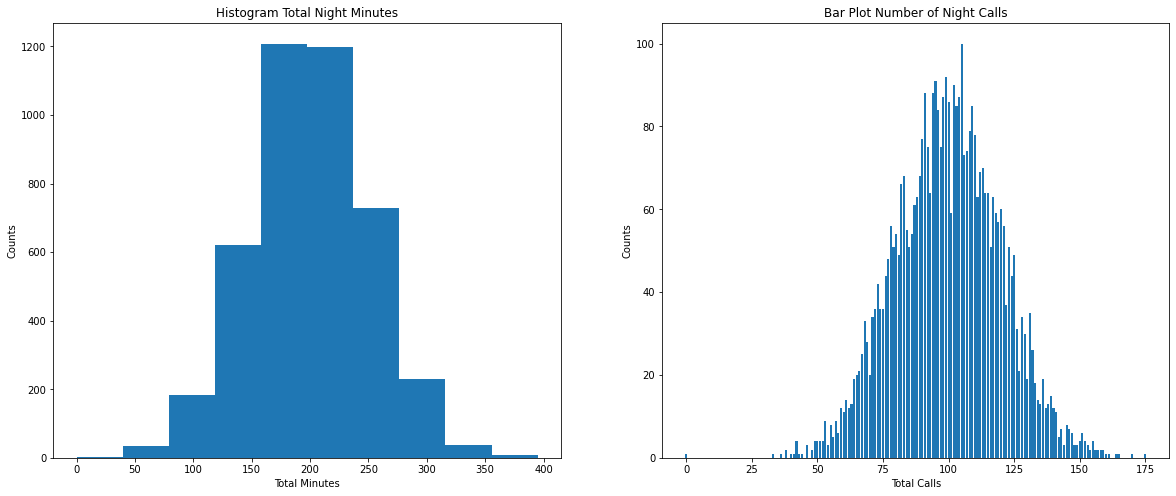

In [ ]:
# create visualization figure for barplot
fig, ax = plt.subplots(ncols=2,figsize=(20,8)) 

# describe each graph
ax[0].hist(x=df_raw['total_night_minutes'])
ax[0].set_title('Histogram Total Night Minutes')
ax[0].set_xlabel('Total Minutes')
ax[0].set_ylabel('Counts')    

ax[1].bar(x=df_raw['total_night_calls'].value_counts().keys(),
            height=df_raw['total_night_calls'].value_counts().values)    
ax[1].set_title('Bar Plot Number of Night Calls')
ax[1].set_xlabel('Total Calls')
ax[1].set_ylabel('Counts')

Cek *probable outliers* menggunakan fungsi `get_outliers()`

In [ ]:
poss, prob = get_outliers(df_raw,'total_night_minutes')
prob

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn


In [ ]:
poss, prob = get_outliers(df_raw,'total_night_calls')
prob

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
4001,IL,53,area_code_415,no,no,0,214.3,138,36.43,232.2,99,19.74,0.0,0,0.0,8.3,5,2.24,1,no


Seperti pada *day calls*, ada 1 orang *customer* yang memiliki aktivitas normal di periode waktu lain namun tidak memiliki aktivitas sama sekali di periode *night*. Ini tidak bisa dianggap sebagai *outlier* yang terjadi karena kesalahan dan harus dieliminasi, karena mungkin saja *customer* tersebut sedang tidur atau tidak aktif.

### Evening Calls

In [ ]:
df_temp = df_raw.loc[:,['total_eve_minutes','total_eve_calls', 'total_eve_charge']]
corr_mtx = df_temp.corr()
corr_mtx

,total_eve_minutes,total_eve_calls,total_eve_charge
total_eve_minutes,1.000000,0.003101,1.00000
total_eve_calls,0.003101,1.000000,0.00312
total_eve_charge,1.000000,0.003120,1.00000


Dari hasil Pearsons Correlation di atas, diambil `total_eve_minutes` dan `total_eve_calls` sebagai variabel penting, sedangkan `total_eve_charge` akan di-*drop*.

Text(0, 0.5, 'Counts')

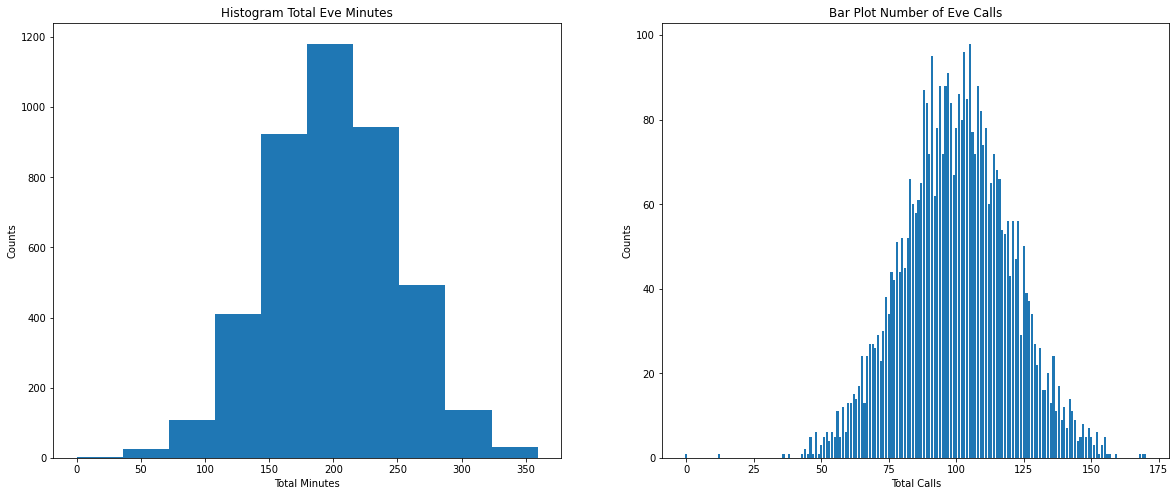

In [ ]:
# create visualization figure for barplot
fig, ax = plt.subplots(ncols=2,figsize=(20,8)) 

# describe each graph
ax[0].hist(x=df_raw['total_eve_minutes']) 
ax[0].set_title('Histogram Total Eve Minutes')
ax[0].set_xlabel('Total Minutes')
ax[0].set_ylabel('Counts')  

ax[1].bar(x=df_raw['total_eve_calls'].value_counts().keys(),
            height=df_raw['total_eve_calls'].value_counts().values)    
ax[1].set_title('Bar Plot Number of Eve Calls')
ax[1].set_xlabel('Total Calls')
ax[1].set_ylabel('Counts')

Cek *probable outliers*:

In [ ]:
poss, prob = get_outliers(df_raw,'total_eve_minutes')
prob

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn


In [ ]:
poss, prob = get_outliers(df_raw,'total_eve_calls')
prob

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
2482,UT,97,area_code_415,no,no,0,209.2,134,35.56,0.0,0,0.0,175.4,94,7.89,11.8,6,3.19,1,no


Seperti sebelumnya, fungsi *probable outliers* mendeteksi 1 *data points* dengan 0 *number of calls*. Walaupun jaraknya dianggap cukup jauh dari pusat data, angka ini tidak bisa 100% dipastikan karena *error* sehingga lebih baik dipertahankan agar *dataset* akhir tidak *biased*.

### International Calls

Selain *minutes*, *calls*, dan *charge* seperti 3 jenis aktivitas sebelumnya, *international calls* memiliki 1 variabel tambahan, yaitu *international_plan* yang merupakan data kategori biner (*boolean*). Pada analisis *voice mail*, dilihat bahwa *number_vmail_messages* dan *voice_mail_plan* memiliki korelasi tinggi sehingga *voice_mail_plan* saja yang akan digunakan di akhir. Oleh karena itu, di sini dicari korelasi antara `total_intl_minutes`, `total_intl_calls`, `total_intl_charge`, dan `international_plan`.

In [ ]:
df_temp = df_raw.loc[:,['international_plan','total_intl_minutes','total_intl_calls', 'total_intl_charge']]
df_temp['international_plan'] = df_temp['international_plan'].apply(lambda x: 0 if x=='no' else 1)
corr_mtx = df_temp.corr()
corr_mtx

,international_plan,total_intl_minutes,total_intl_calls,total_intl_charge
international_plan,1.000000,0.023815,0.006956,0.023799
total_intl_minutes,0.023815,1.000000,0.019328,0.999993
total_intl_calls,0.006956,0.019328,1.000000,0.019414
total_intl_charge,0.023799,0.999993,0.019414,1.000000


Ternyata, yang memiliki korelasi tinggi hanya  `total_intl_minutes` dan `total_intl_charge` saja. Sama seperti sebelumnya, `total_intl_charge` akan di-*drop* sedangkan yang lain tetap digunakan.

Variabel

Text(0, 0.5, 'Counts')

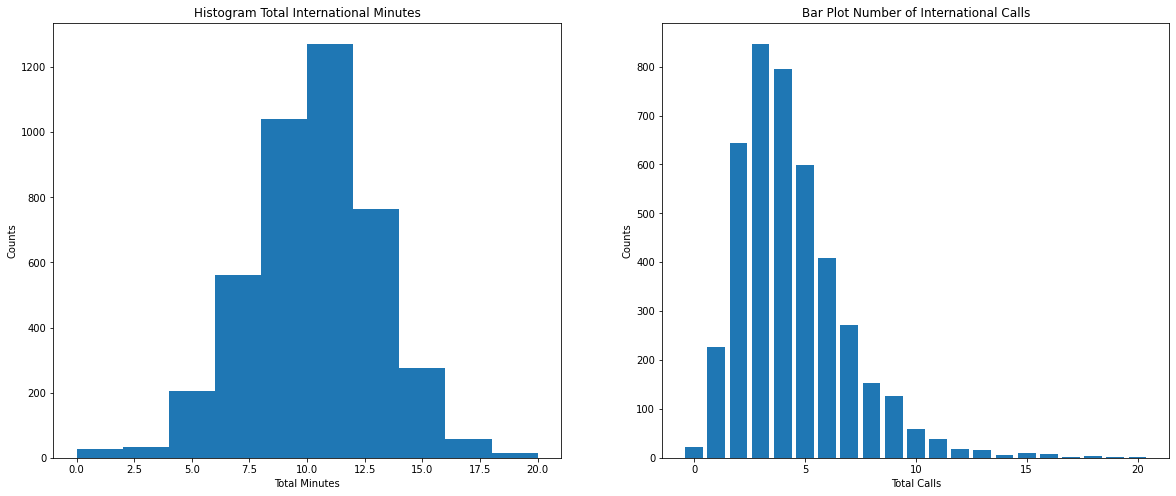

In [ ]:
# create visualization figure for barplot
fig, ax = plt.subplots(ncols=2,figsize=(20,8)) 

# describe each graph
ax[0].hist(x=df_raw['total_intl_minutes'])
ax[0].set_title('Histogram Total International Minutes')
ax[0].set_xlabel('Total Minutes')
ax[0].set_ylabel('Counts') 

ax[1].bar(x=df_raw['total_intl_calls'].value_counts().keys(),
            height=df_raw['total_intl_calls'].value_counts().values)    
ax[1].set_title('Bar Plot Number of International Calls')
ax[1].set_xlabel('Total Calls')
ax[1].set_ylabel('Counts')

Cek *probable outliers*

In [ ]:
poss, prob = get_outliers(df_raw,'total_intl_minutes')
prob

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn


In [ ]:
poss, prob = get_outliers(df_raw,'total_intl_calls')
prob

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
18,AZ,130,area_code_415,no,no,0,183.0,112,31.11,72.9,99,6.20,181.8,78,8.18,9.5,19,2.57,0,no
312,ND,79,area_code_408,no,no,0,205.7,123,34.97,214.5,108,18.23,226.1,106,10.17,6.7,18,1.81,1,no
824,ND,84,area_code_415,no,yes,33,159.1,106,27.05,149.8,101,12.73,213.4,108,9.60,13.0,18,3.51,1,no
1320,WV,94,area_code_415,no,no,0,85.9,113,14.60,226.7,91,19.27,279.6,110,12.58,15.6,16,4.21,0,no
2222,MO,84,area_code_415,no,yes,35,207.5,138,35.28,201.0,116,17.09,164.5,107,7.40,7.5,16,2.03,4,no
2503,NM,112,area_code_415,no,no,0,81.6,94,13.87,268.1,112,22.79,140.8,75,6.34,8.6,18,2.32,1,no
2793,MI,119,area_code_510,yes,yes,22,172.1,119,29.26,223.6,133,19.01,150.0,94,6.75,13.9,20,3.75,1,yes
2810,NY,94,area_code_415,no,no,0,190.4,91,32.37,92.0,107,7.82,224.8,108,10.12,13.6,17,3.67,2,no
2994,AZ,94,area_code_415,no,no,0,195.1,105,33.17,272.4,100,23.15,142.7,102,6.42,11.5,16,3.11,1,no
3068,VA,114,area_code_415,no,yes,34,114.5,64,19.47,229.3,84,19.49,288.8,68,13.00,10.4,16,2.81,0,no


Karena *central tendency* dari *international calls* cukup rendah dibanding lainnya, 16 kali sudah dianggap *outlier* walaupun jumlahnya masih masuk akal. Seperti sebelumnya, karena tidak bisa dipastikan ini adalah *error*, maka ke-14 *data points* ini akan di-*keep*.

### Number of Customer Service Calls

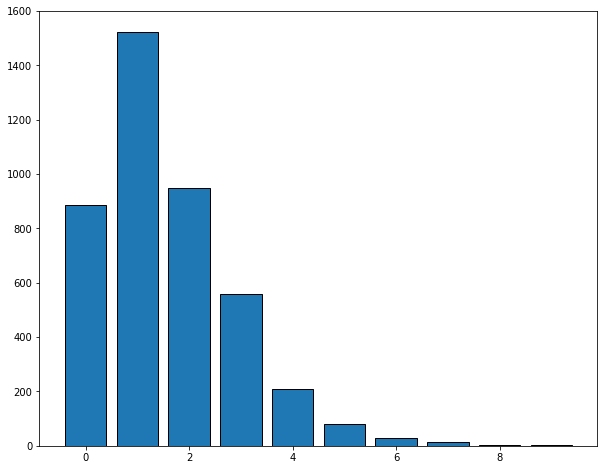

In [ ]:
fig = plt.figure(figsize=(10,8))
_ = plt.bar(height=df_raw['number_customer_service_calls'].value_counts().values,
            x=df_raw['number_customer_service_calls'].value_counts().keys(),ec='black')
plt.show()

Bisa dilihat bahwa walau mayoritas *customer* hanya pernah menghubungi *customer service* 0-2 kali, ada beberapa nilai ekstrim di sisi kanan *bar plot*. Berikut adalah hasil *probable outliers* variabel `number_customer_service_calls`:

In [ ]:
poss, prob = get_outliers(df_raw,'number_customer_service_calls')
prob

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
277,AL,86,area_code_415,no,no,0,128.3,121,21.81,197.1,93,16.75,138.4,152,6.23,12.2,5,3.29,7,yes
433,KY,122,area_code_408,no,yes,27,253.7,84,43.13,229.2,109,19.48,190.5,123,8.57,9.2,5,2.48,7,no
449,MN,152,area_code_415,yes,yes,20,237.5,120,40.38,253.4,94,21.54,265.2,80,11.93,14.2,3,3.83,9,yes
577,WI,165,area_code_510,no,no,0,154.2,91,26.21,268.6,108,22.83,188.8,99,8.50,10.9,4,2.94,6,no
602,UT,103,area_code_510,no,yes,36,87.2,92,14.82,169.3,110,14.39,166.7,80,7.50,10.9,5,2.94,6,yes
650,LA,115,area_code_415,no,yes,26,170.5,107,28.99,217.2,77,18.46,225.7,71,10.16,13.6,5,3.67,6,no
754,HI,149,area_code_510,no,no,0,166.6,61,28.32,218.8,107,18.60,208.3,131,9.37,8.2,6,2.21,7,no
759,CO,23,area_code_408,no,no,0,190.2,89,32.33,166.4,108,14.14,219.8,73,9.89,15.0,4,4.05,6,no
816,OR,21,area_code_510,no,yes,31,135.9,90,23.10,271.0,84,23.04,179.1,89,8.06,9.5,7,2.57,6,no
1072,MT,28,area_code_415,no,no,0,121.7,48,20.69,125.8,112,10.69,261.6,122,11.77,8.3,2,2.24,6,yes


In [ ]:
poss, prob = get_outliers(df_raw,'number_customer_service_calls')
prob['number_customer_service_calls'].min()

6

<BarContainer object of 37 artists>

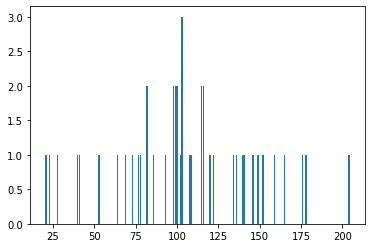

In [ ]:
df_temp = df_raw[df_raw['number_customer_service_calls']>=6]['account_length']
plt.bar(x=df_temp.value_counts().keys(),
        height=df_temp.value_counts().values)

Berdasarkan analisis di atas, terlihat bahwa mayoritas pelanggan dalam kategori *probable outliers* ini minimal sudah berlangganan selama ~2 tahun. Ada kemungkinan *service* ISP milik pelanggan tersebut terganggu, ada masalah pembayaran, atau mungkin terjadi hal lain sehinga tidak menutup kemungkinan apabila pelanggan menghubungi *customer service* >=6 kali. Dengan demikian kandidat *outliers* ini tidak akan di-*drop*

## Univariat Categorical Analysis

In [ ]:
nom_col = ['state','area_code','international_plan','voice_mail_plan','churn']

In [ ]:
df_raw[[c for c in df_raw.columns if c in nom_col]].nunique(axis=0)         # shows numbers of unique values for each category

state                 51
area_code              3
international_plan     2
voice_mail_plan        2
churn                  2
dtype: int64

- Analisis di atas mengkonfirmasi bahwa variabel `international_plan`, `voice_mail_plan`, dan `churn` merupakan tipe kategori biner (*boolean*) dengan *value* yang sudah standar (hanya 'yes' dan 'no'). Pada pembuatan model dan analisis hubungan dengan variabel lain, tipe data ini bisa diperlakukan seperti data ordinal dan akan lebih baik bila di-*convert* ke bentuk angka dengan 1=yes dan 0=no
- `state` memiliki 51 *unique value* sedangkan ada 50 *states* di USA, sehingga perlu diinvestigasi lebih lanjut.
- `area_code` dan `state` harus diubah tipe datanya menjadi kategori (`.astype('category')`) serta harus dicari model dan algoritma yang mampu meng-*handle categorical data*. 

### Churn

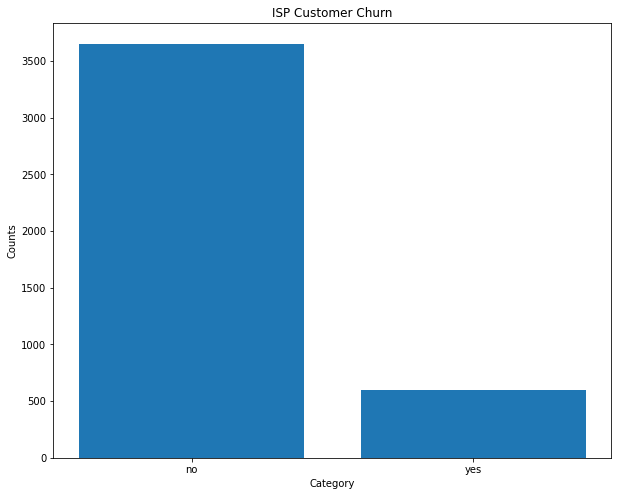

In [ ]:
fig = plt.figure(figsize=(10,8))
plt.bar(x=df_raw['churn'].value_counts().keys(),
            height=df_raw['churn'].value_counts().values)
plt.title('ISP Customer Churn')
plt.ylabel('Counts')
plt.xlabel('Category')
plt.show()

Pada *bar plot*, terlihat bahwa jumlah *customer* yang melanjutkan berlangganan (`churn`='no') jauh lebih banyak daripada yang berhenti. Idealnya, dilakukan teknik seperti *Synthetic Minority Oversampling Technique* (SMOTE) untuk mengatasi *imbalanced classification*, namun pada *challenge* ini dataset *training* akan diterima seadanya dengan asumsi dataset representatif terhadap kondisi populasi.

### International and Voice Mail Plan

Text(0, 0.5, 'Counts')

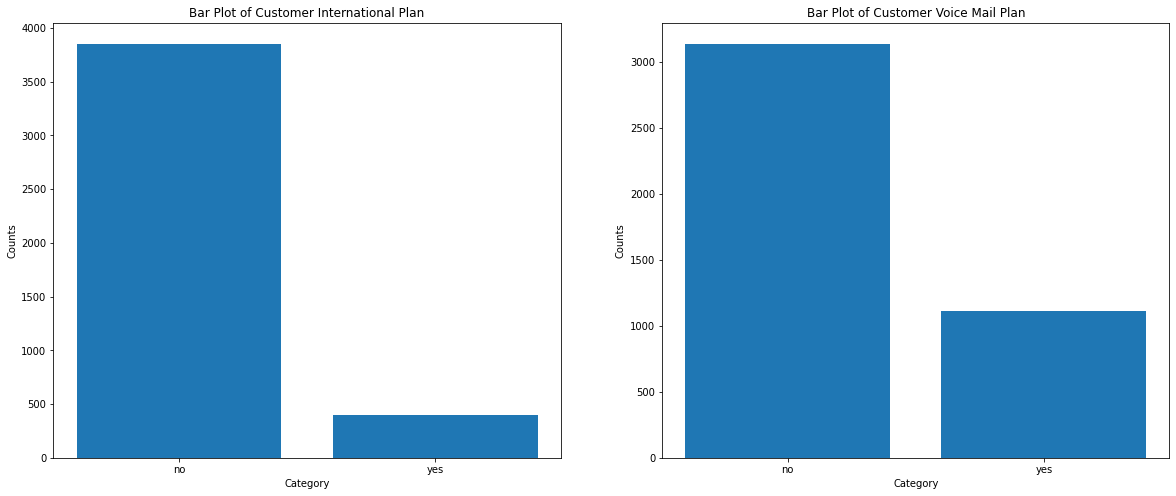

In [ ]:
# create visualization figure for barplot
fig, ax = plt.subplots(ncols=2,figsize=(20,8)) 

# describe each graph
ax[0].bar(x=df_raw['international_plan'].value_counts().keys(),
            height=df_raw['international_plan'].value_counts().values)
ax[0].set_title('Bar Plot of Customer International Plan')
ax[0].set_xlabel('Category')
ax[0].set_ylabel('Counts')

ax[1].bar(x=df_raw['voice_mail_plan'].value_counts().keys(),
            height=df_raw['voice_mail_plan'].value_counts().values)    
ax[1].set_title('Bar Plot of Customer Voice Mail Plan')
ax[1].set_xlabel('Category')
ax[1].set_ylabel('Counts')

Terlihat bahwa untuk kedua variabel, jauh lebih banyak pelanggan yang masuk ke kategori 'no'. Seberapa berpengaruh keduanya terhadap *churn* dapat dilihat pada analisis hubungan data di bawah.

### State

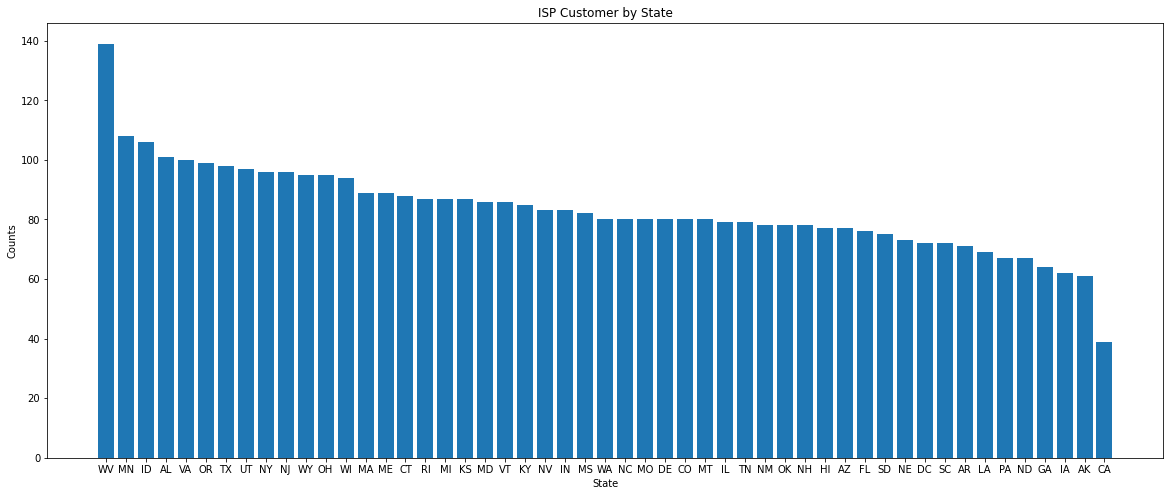

In [ ]:
fig = plt.figure(figsize=(20,8))
plt.bar(x=df_raw['state'].value_counts().keys(),
            height=df_raw['state'].value_counts().values)
plt.title('ISP Customer by State')
plt.ylabel('Counts')
plt.xlabel('State')
plt.show()

Berdasarkan *bar plot* di atas, dapat dilihat bahwa ternyata dataset ini membedakan WA (Washington, negara bagian) dan DC (District of Columbia, ibu kota USA, yang berada di negara bagian lain). Ini tidak terlalu mempengaruhi proses klasifikasi jadi akan dibiarkan saja, namun perlu diingat apabila ingin memvisualisasikan data ke bentuk *geochart*.

### Area Code

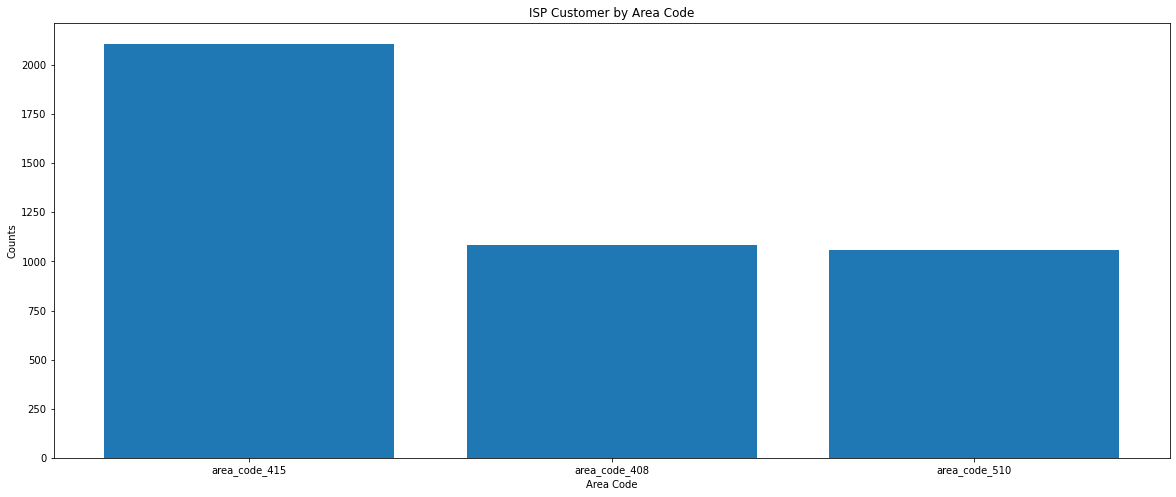

In [ ]:
fig = plt.figure(figsize=(20,8))
plt.bar(x=df_raw['area_code'].value_counts().keys(),
            height=df_raw['area_code'].value_counts().values)
plt.title('ISP Customer by Area Code')
plt.ylabel('Counts')
plt.xlabel('Area Code')
plt.show()

Data ini cukup mencurigakan karena hanya ada 3 jenis kode area dalam dataset, sedangkan seharusnya bila ada 50 states maka kode area unik yang tercatat akan lebih banyak lagi. Selain itu, ketiga kode area tersebut berada di [negara bagian California](https://www.cpuc.ca.gov/areacodes/). Untuk memastikan apakah variabel ini mengandung informasi berarti, bisa kita lihat negara bagian apa yang tercatat untuk data dengan kode area 415.

In [ ]:
df_raw[df_raw['area_code']=='area_code_415']['state'].value_counts()

WV    62
ID    59
OR    56
AL    54
VA    54
      ..
ND    30
OK    29
GA    25
IA    24
CA    19
Name: state, Length: 51, dtype: int64

Terlihat bahwa kode area dalam dataset ini tidak terikat dengan lokasi geografis. Untuk melihat bagaimana kode area berefek terhadap *churn* seorang pelanggan, bisa digunakan *frequency table*

In [ ]:
# get marginal distribution and conditional probability
def frequency_table(data, col_target, column):
	freq_table = pd.crosstab(index=data[col_target], columns=data[column], margins=True)        # find counts of all possible combinations between 2 categorical data
	rel_table = round(freq_table/freq_table.loc["All"], 2)                                      # create relative table to see the ration between frequency of a combination and total occurences of its column
	return freq_table, rel_table

df_freq, df_rel = frequency_table(df_raw, "churn", "area_code")
print("Two-way frequency table")
print(df_freq)
print("---" * 15)
print("Two-way relative frequency table")
print(df_rel)

Two-way frequency table
area_code  area_code_408  area_code_415  area_code_510   All
churn                                                       
no                   934           1821            897  3652
yes                  152            287            159   598
All                 1086           2108           1056  4250
---------------------------------------------
Two-way relative frequency table
area_code  area_code_408  area_code_415  area_code_510   All
churn                                                       
no                  0.86           0.86           0.85  0.86
yes                 0.14           0.14           0.15  0.14
All                 1.00           1.00           1.00  1.00


Dari relative frequency table di atas, terlihat bahwa pelanggan dari tiap kode area memiliki ~0.86 kemungkinan untuk lanjut dan ~0.14 kemungkinan untuk berhenti, sehingga tidak ada efek signifikan dari kode area terhadap *churn* dan akan lebih baik bila variabel ini di-*drop*.

# Feature Engineering

Dilakukan pemilihan variabel berdasarkan pengamatan pada tahap EDA.

In [ ]:
# drop unnecessary columns
df_clean = df_raw.copy().drop(axis='columns',labels=['number_vmail_messages','total_day_charge', 'total_night_charge', 'total_eve_charge','total_intl_charge','area_code'])
df_clean.head()

,state,account_length,international_plan,voice_mail_plan,total_day_minutes,total_day_calls,total_eve_minutes,total_eve_calls,total_night_minutes,total_night_calls,total_intl_minutes,total_intl_calls,number_customer_service_calls,churn
0,OH,107,no,yes,161.6,123,195.5,103,254.4,103,13.7,3,1,no
1,NJ,137,no,no,243.4,114,121.2,110,162.6,104,12.2,5,0,no
2,OH,84,yes,no,299.4,71,61.9,88,196.9,89,6.6,7,2,no
3,OK,75,yes,no,166.7,113,148.3,122,186.9,121,10.1,3,3,no
4,MA,121,no,yes,218.2,88,348.5,108,212.6,118,7.5,7,3,no


In [ ]:
# convert binary categorical data to boolean (0 and 1)
df_clean['international_plan'] = df_clean['international_plan'].apply(lambda x: 0 if x=='no' else 1)
df_clean['voice_mail_plan'] = df_clean['voice_mail_plan'].apply(lambda x: 0 if x=='no' else 1)
df_clean['churn'] = df_clean['churn'].apply(lambda x: 0 if x=='no' else 1)
df_clean.head()

,state,account_length,international_plan,voice_mail_plan,total_day_minutes,total_day_calls,total_eve_minutes,total_eve_calls,total_night_minutes,total_night_calls,total_intl_minutes,total_intl_calls,number_customer_service_calls,churn
0,OH,107,0,1,161.6,123,195.5,103,254.4,103,13.7,3,1,0
1,NJ,137,0,0,243.4,114,121.2,110,162.6,104,12.2,5,0,0
2,OH,84,1,0,299.4,71,61.9,88,196.9,89,6.6,7,2,0
3,OK,75,1,0,166.7,113,148.3,122,186.9,121,10.1,3,3,0
4,MA,121,0,1,218.2,88,348.5,108,212.6,118,7.5,7,3,0


## Data Relationships

Hubungan antar variabel dilihat menggunakan fungsi `associations()` dari *library* `dython` yang menawarkan cara lebih mudah untuk melihat korelasi antara kombinasi jenis data yang berbeda secara simultan. Di sini, *nominal-nominal associations* dilakukan menggunakan dengan [Theil's U](https://towardsdatascience.com/the-search-for-categorical-correlation-a1cf7f1888c9), numeric-numeric menggunakan Pearson's r, dan nominal-numeric menggunakan Correlation Ratio. 

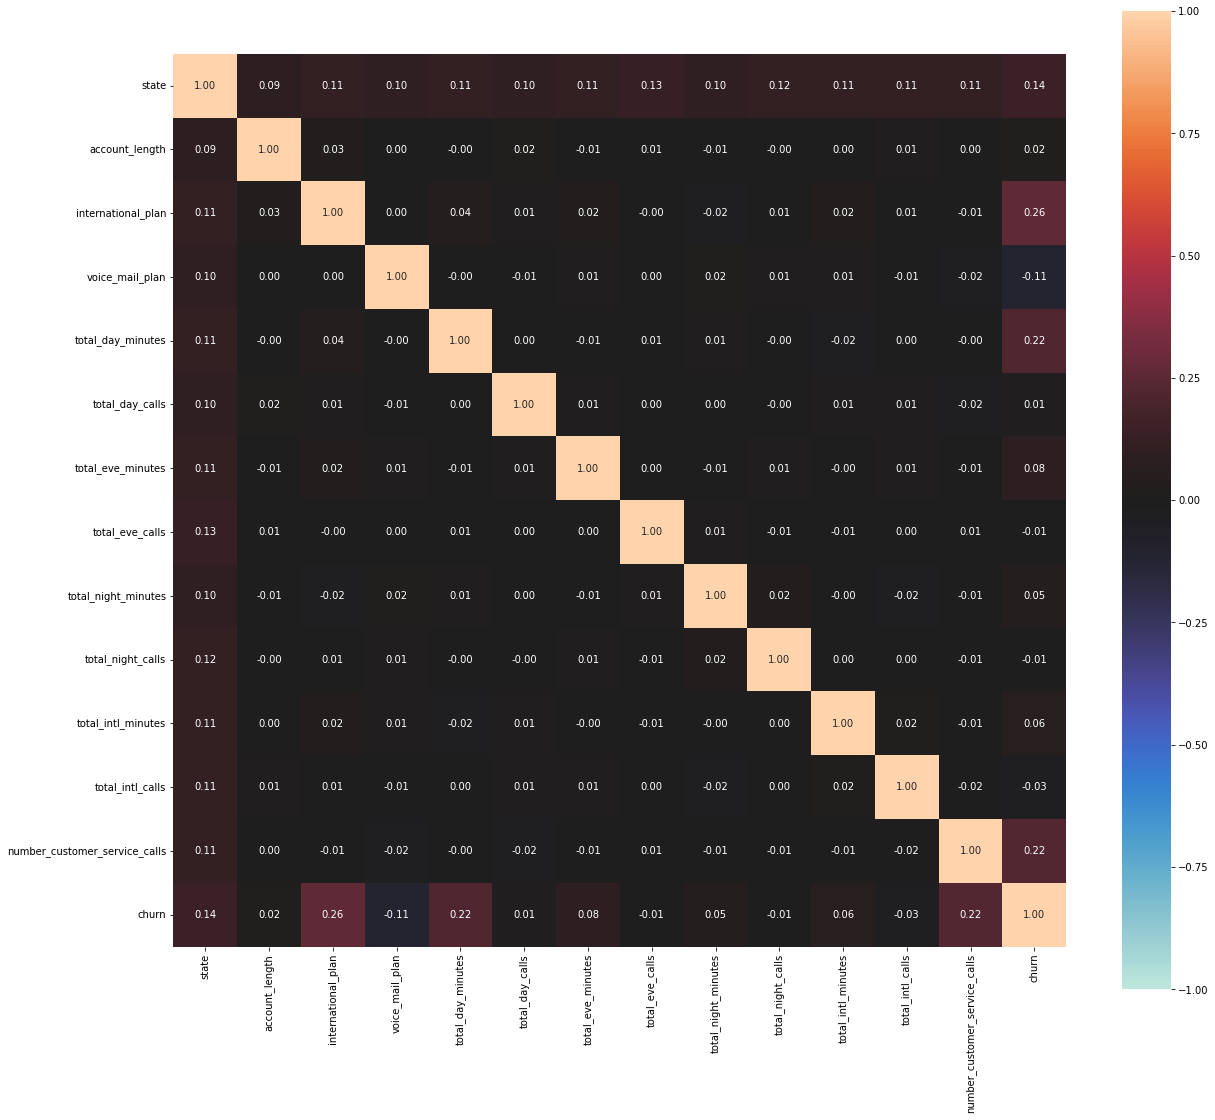

{'corr':                                   state  account_length  international_plan  \
 state                          1.000000        0.091550            0.110094   
 account_length                 0.091550        1.000000            0.027050   
 international_plan             0.110094        0.027050            1.000000   
 voice_mail_plan                0.098127        0.001663            0.000714   
 total_day_minutes              0.112518       -0.001612            0.040059   
 total_day_calls                0.099690        0.023002            0.009776   
 total_eve_minutes              0.113309       -0.010326            0.023484   
 total_eve_calls                0.127328        0.005535           -0.003004   
 total_night_minutes            0.100460       -0.009916           -0.020694   
 total_night_calls              0.116909       -0.001846            0.007153   
 total_intl_minutes             0.113322        0.004539            0.023815   
 total_intl_calls               

In [ ]:
nom_col = ['state']
num_col = ['account_length', 'international_plan', 'voice_mail_plan', 'total_day_minutes', 'total_day_calls', 'total_eve_minutes',
           'total_eve_calls', 'total_night_minutes', 'total_night_calls',
           'total_intl_minutes', 'total_intl_calls',
           'number_customer_service_calls', 'churn']
associations(df_clean,nominal_columns=nom_col,numerical_columns=num_col,nom_nom_assoc='theil',num_num_assoc='pearson',nom_num_assoc='correlation_ratio',annot=True,figsize=(20,18))

Berdasarkan *heatmap* di atas, terlihat bahwa ternyata `state` memiliki korelasi relatif tinggi terhadap `churn` sehingga menjadi salah satu fitur penting yang harus diolah oleh ML.

Namun, berhubung `state` merupakan categorical data dengan 51 kategori, maka jumlah fitur yang akan dimasukkan ke model *machine learning* setelah *encoding* juga akan bertambah drastis. Oleh karena itu, sebelumnya dilakukan *binning* berdasarkan [*region* yang ditetapkan Badan Sensus Amerika Serikat](https://en.wikipedia.org/wiki/List_of_regions_of_the_United_States). Metode ini merupakan salah satu teknik paling mudah untuk mengelompokkan banyak kategori dan mengurangi *cardinality* categorical variable.

In [ ]:
lst_northeast = ['CT','ME','MA','NH','RI','VT','NJ','NY','PA']
lst_midwest = ['IL','IN','MI','OH','WI','IO','KS','MN','MO','NE','ND','SD']
lst_south = ['DE','FL','GA','MD','NC','SC','VA','DC','WV','AL','KY','MS','TN','AR','LA','OK','TX']
lst_west = ['AZ','CO','ID','MT','NV','NM','UT','WY','AK','CA','HI','OR','WA']

In [ ]:
df_clean_state = df_clean.copy()
df_clean_state['state'] = df_clean_state['state'].apply(lambda x: 'Northeast' if x in lst_northeast else 'Midwest' if x in lst_midwest else 'South' if x in lst_south else 'West')
df_clean_state['state'].value_counts()

South        1432
West         1114
Midwest       928
Northeast     776
Name: state, dtype: int64

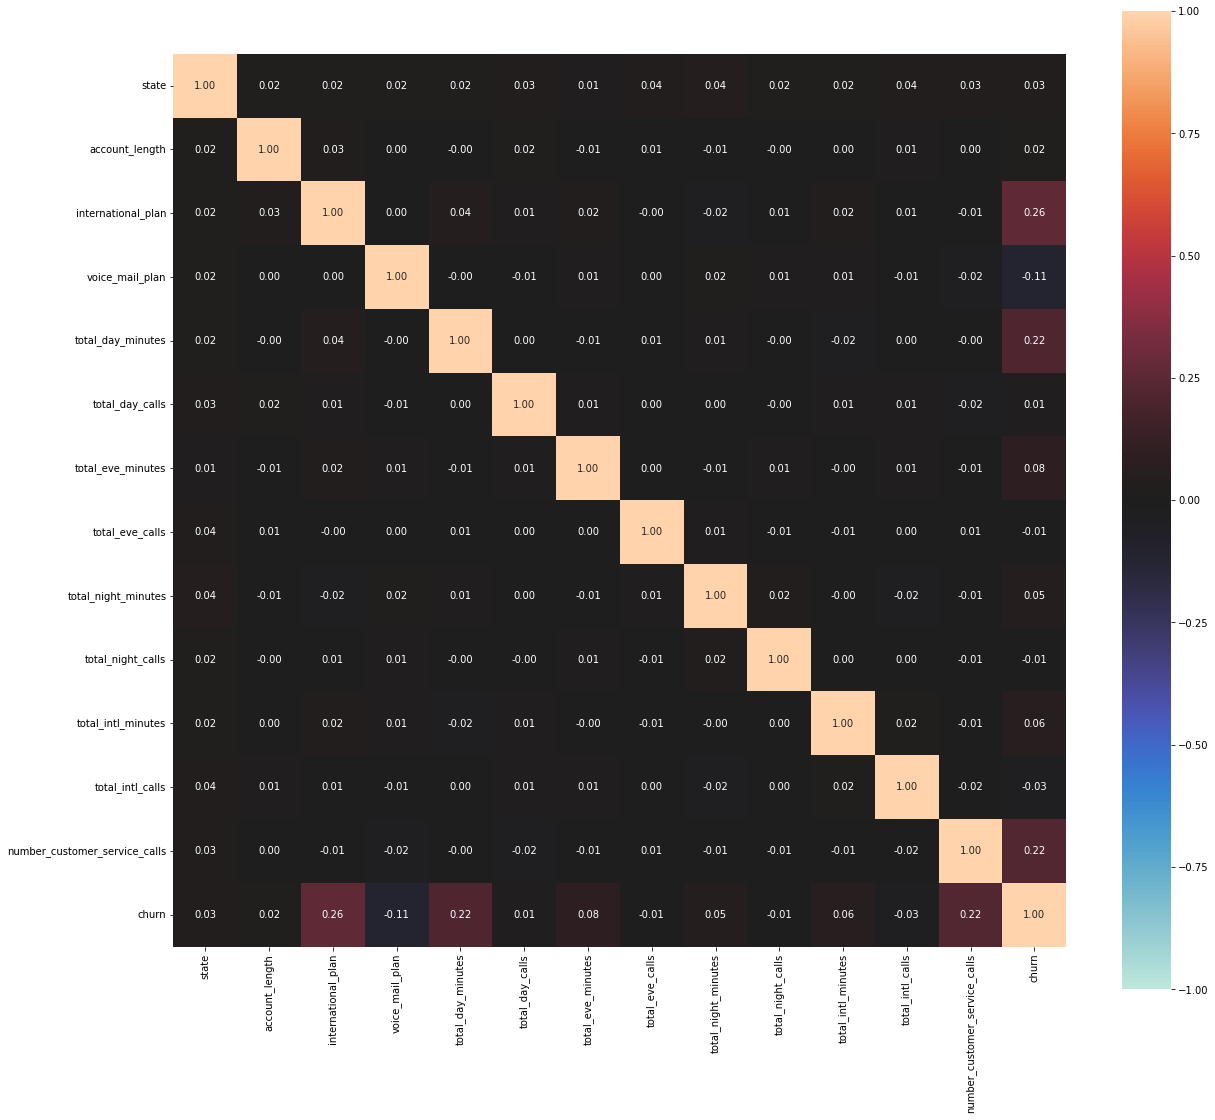

{'corr':                                   state  account_length  international_plan  \
 state                          1.000000        0.018565            0.019497   
 account_length                 0.018565        1.000000            0.027050   
 international_plan             0.019497        0.027050            1.000000   
 voice_mail_plan                0.015888        0.001663            0.000714   
 total_day_minutes              0.022611       -0.001612            0.040059   
 total_day_calls                0.025525        0.023002            0.009776   
 total_eve_minutes              0.009499       -0.010326            0.023484   
 total_eve_calls                0.035371        0.005535           -0.003004   
 total_night_minutes            0.043242       -0.009916           -0.020694   
 total_night_calls              0.020612       -0.001846            0.007153   
 total_intl_minutes             0.021995        0.004539            0.023815   
 total_intl_calls               

In [ ]:
nom_col = ['state']
num_col = ['account_length', 'international_plan', 'voice_mail_plan', 'total_day_minutes', 'total_day_calls', 'total_eve_minutes',
           'total_eve_calls', 'total_night_minutes', 'total_night_calls',
           'total_intl_minutes', 'total_intl_calls',
           'number_customer_service_calls', 'churn']
associations(df_clean_state,nominal_columns=nom_col,numerical_columns=num_col,nom_nom_assoc='theil',num_num_assoc='pearson',nom_num_assoc='correlation_ratio',annot=True,figsize=(20,18))

Dari *heatmap* tersebut, dapat dilihat bahwa korelasi antara `churn` dan `state` menurun 0.11, jumlah yang cukup signifikan. Ini merupakan resiko/*tradeoff* melakukan *binning* terhadap `state` berdasar *region* dibanding menggunakan frekuensi atau metode lain. Walaupun mungkin kurang optimal dan masih bisa ditingkatkan lagi, untuk saat ini prosedur yang dilakukan dianggap telah cukup me-*retain* informasi dari *categorical variable* `state` bagi model ML yang akan digunakan.

## Final DataFrame

Setelah dilakukan *binning* terhadap variabel `state`, perlu dilakukan [***dummy encoding***](https://towardsdatascience.com/encoding-categorical-variables-one-hot-vs-dummy-encoding-6d5b9c46e2db) seperti berikut:

In [ ]:
df_final = pd.get_dummies(df_clean_state,prefix='state',
                          columns=['state'],
                          drop_first=True)
df_final.head()

,account_length,international_plan,voice_mail_plan,total_day_minutes,total_day_calls,total_eve_minutes,total_eve_calls,total_night_minutes,total_night_calls,total_intl_minutes,total_intl_calls,number_customer_service_calls,churn,state_Northeast,state_South,state_West
0,107,0,1,161.6,123,195.5,103,254.4,103,13.7,3,1,0,0,0,0
1,137,0,0,243.4,114,121.2,110,162.6,104,12.2,5,0,0,1,0,0
2,84,1,0,299.4,71,61.9,88,196.9,89,6.6,7,2,0,0,0,0
3,75,1,0,166.7,113,148.3,122,186.9,121,10.1,3,3,0,0,1,0
4,121,0,1,218.2,88,348.5,108,212.6,118,7.5,7,3,0,1,0,0


In [ ]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   account_length                 4250 non-null   int64  
 1   international_plan             4250 non-null   int64  
 2   voice_mail_plan                4250 non-null   int64  
 3   total_day_minutes              4250 non-null   float64
 4   total_day_calls                4250 non-null   int64  
 5   total_eve_minutes              4250 non-null   float64
 6   total_eve_calls                4250 non-null   int64  
 7   total_night_minutes            4250 non-null   float64
 8   total_night_calls              4250 non-null   int64  
 9   total_intl_minutes             4250 non-null   float64
 10  total_intl_calls               4250 non-null   int64  
 11  number_customer_service_calls  4250 non-null   int64  
 12  churn                          4250 non-null   i

Seperti yang terlihat di atas, `df_final` memiliki 15 *features* dengan tipe data numerical. *Dataframe* ini siap diproses menggunakan *machine learning*

## Split DataFrame, Validation Setup

Model yang dipilih untuk dibandingkan dalam *challenge* ini adalah **XGBoost** yang merupakan *ensemble* dari model Decision Tree dan **SVM (Support Vector Machine)**. Kedua model tersebut dipilih karena tidak adanya asumsi normalitas  terhadap data, dapat meng-*handle* *colinearity* yang mungkin ada dalam data (walaupun sudah berusaha dieliminasi dalam tahap *preprocessing*) dengan baik, serta solusinya tidak harus *linear*.

Proses validasi akurasi dan skor F1 tiap model akan dilakukan dengan **`Stratified K-Fold`** dari `scikit-learn` sehingga data pada tiap *fold* representatif terhadap populasi. Untuk memilih *hyperparameters* yang terbaik (*hyperparameter tuning*), digunakan **`GridSearchCV`** dari `scikit-learn`

Kode berikut membagi dataset menjadi x dan y:

In [ ]:
X = df_final.copy().drop(axis='columns',labels=['churn'])
y = df_final.iloc[:, 12]

In [ ]:
X.shape 

(4250, 15)

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   account_length                 4250 non-null   int64  
 1   international_plan             4250 non-null   int64  
 2   voice_mail_plan                4250 non-null   int64  
 3   total_day_minutes              4250 non-null   float64
 4   total_day_calls                4250 non-null   int64  
 5   total_eve_minutes              4250 non-null   float64
 6   total_eve_calls                4250 non-null   int64  
 7   total_night_minutes            4250 non-null   float64
 8   total_night_calls              4250 non-null   int64  
 9   total_intl_minutes             4250 non-null   float64
 10  total_intl_calls               4250 non-null   int64  
 11  number_customer_service_calls  4250 non-null   int64  
 12  state_Northeast                4250 non-null   u

In [ ]:
y.shape

(4250,)

Dilakukan pembagian train-test dengan rasio 85%-15% dimana 85% akan digunakan untuk cross-validation dalam perbandingan model dan *hyperparameter tuning* untuk optimisasi parameter dari model yang terpilih, sedangkan 15% akan digunakan sebagai data terakhir untuk melihat performa dari model (dengan *hyperparameters* yang sudah ditentukan) terhadap *unseen data*. Bila sudah memuaskan, dilakukan pembuatan *final model* yang di-*train* menggunakan semua data dalam train.csv untuk kemudian memprediksi label data pada test.csv

In [ ]:
X_cv, X_test, y_cv, y_test = train_test_split(X, y,
                test_size = 0.15, random_state = 420)

In [ ]:
X_cv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3612 entries, 4126 to 2993
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   account_length                 3612 non-null   int64  
 1   international_plan             3612 non-null   int64  
 2   voice_mail_plan                3612 non-null   int64  
 3   total_day_minutes              3612 non-null   float64
 4   total_day_calls                3612 non-null   int64  
 5   total_eve_minutes              3612 non-null   float64
 6   total_eve_calls                3612 non-null   int64  
 7   total_night_minutes            3612 non-null   float64
 8   total_night_calls              3612 non-null   int64  
 9   total_intl_minutes             3612 non-null   float64
 10  total_intl_calls               3612 non-null   int64  
 11  number_customer_service_calls  3612 non-null   int64  
 12  state_Northeast                3612 non-null 

In [ ]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 638 entries, 3339 to 2219
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   account_length                 638 non-null    int64  
 1   international_plan             638 non-null    int64  
 2   voice_mail_plan                638 non-null    int64  
 3   total_day_minutes              638 non-null    float64
 4   total_day_calls                638 non-null    int64  
 5   total_eve_minutes              638 non-null    float64
 6   total_eve_calls                638 non-null    int64  
 7   total_night_minutes            638 non-null    float64
 8   total_night_calls              638 non-null    int64  
 9   total_intl_minutes             638 non-null    float64
 10  total_intl_calls               638 non-null    int64  
 11  number_customer_service_calls  638 non-null    int64  
 12  state_Northeast                638 non-null   

Dibuat juga `StratifiedKFold` object `skf` agar proses *cross validation* untuk tiap iterasi kedua model sama. *Stratified sampling* ini penting dilakukan mengingat *dataset* yang digunakan cukup *imbalance* dengan jauh lebih banyak pelanggan yang lanjut berlangganan.

In [ ]:
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=420)        # create stratified k-fold object

# Method Comparison

Pemilihan model dilakukan dengan membandingkan akurasi, *precision*, *recall*, dan skor f1 rata-rata tiap *fold* pada *cross validation* dari *base model* XGB dan SVM.

In [ ]:
def compare_model(X_train, y_train):
  dfs = []
  models = [                                                # set model we want to compare
          ('SVM', make_pipeline(RobustScaler(),SVC())),     # create pipeline: scale -> svc
          ('XGB', xgb.XGBClassifier())
        ]

  # all the metrics we want to know for each folds
  scorer_acc = make_scorer(accuracy_score)
  scorer_prec = make_scorer(precision_score)
  scorer_rec = make_scorer(recall_score)
  scorer_f1 = make_scorer(f1_score)
  scorers = {'acc':scorer_acc,
             'prec':scorer_prec,
             'rec':scorer_rec,
             'f1':scorer_f1}

  # do cv for every model called name in models
  for name, model in models:
        cv_results = cross_validate(model, X_train, y_train, cv=skf,scoring=scorers)      # train model using skf as cross validation fold
        clf = model.fit(X_train, y_train)
        this_df = pd.DataFrame(cv_results)            # turn cv results into a dataframe
        this_df['model'] = name                       # insert name in 'model' column
        dfs.append(this_df)                           # add this_df to dfs
  final = pd.concat(dfs, ignore_index=True)
  return final

In [ ]:
result = compare_model(X_cv,y_cv)
print(result)

    fit_time  score_time  test_acc  test_prec  test_rec   test_f1 model
0   0.182629    0.024949  0.922652   0.896552  0.509804  0.650000   SVM
1   0.152173    0.025392  0.903315   0.863636  0.372549  0.520548   SVM
2   0.157537    0.023970  0.927978   0.928571  0.520000  0.666667   SVM
3   0.150229    0.023696  0.914127   0.857143  0.470588  0.607595   SVM
4   0.159873    0.024099  0.908587   0.846154  0.431373  0.571429   SVM
5   0.152695    0.026016  0.900277   0.777778  0.411765  0.538462   SVM
6   0.153107    0.022975  0.903047   0.900000  0.352941  0.507042   SVM
7   0.149384    0.023260  0.886427   0.708333  0.333333  0.453333   SVM
8   0.150349    0.023866  0.916898   0.838710  0.509804  0.634146   SVM
9   0.149525    0.023782  0.900277   0.857143  0.352941  0.500000   SVM
10  0.271959    0.004097  0.944751   0.969697  0.627451  0.761905   XGB
11  0.174377    0.003912  0.953039   0.904762  0.745098  0.817204   XGB
12  0.175857    0.004028  0.961219   1.000000  0.720000  0.83720

In [ ]:
result.groupby(by='model').mean()

,fit_time,score_time,test_acc,test_prec,test_rec,test_f1
model,,,,,,
SVM,0.155750,0.024201,0.908358,0.847402,0.426510,0.564922
XGB,0.189257,0.004320,0.952937,0.934227,0.719059,0.811010


Berdasarkan hasil yang didapat tersebut, terlihat bahwa walaupun model XGB lebih lambat dari SVM (baik *fitting* maupun *scoring*), namun performa yang ditunjukkan semua *metrics*-nya jauh lebih superior. Di sini, SVM memiliki *recall* yang sangat rendah sehingga skor f1 yang merupakan *harmonic mean* antara *recall* dan *precision* juga menjadi rendah. Dengan demikian, **XGBoost** dipilih sebagai algoritma yang akan digunakan dalam *challenge* ini.

# XGBoost Hyperparameter Tuning

*Hyperparameter tuning* di sini dilakukan menggunakan **`GridSearchCV`** dimana kita mendefinisikan beberapa opsi nilai untuk *hyperparameter* model XGBClassifier dan GridSearchCV akan secara otomatis mencari kombinasi nilai yang menghasilkan performa terbaik (di sini baik/tidaknya performa dinilai berdasar skor f1).

In [ ]:
# define method used to measure model performance
scorer_acc = make_scorer(accuracy_score)
scorer_prec = make_scorer(precision_score)
scorer_rec = make_scorer(recall_score)
scorer_f1 = make_scorer(f1_score)
scorers = {'acc':scorer_acc,
           'prec':scorer_prec,
           'rec':scorer_rec,
           'f1':scorer_f1}

clf = xgb.XGBClassifier()                 # create XGBClassifier instance

# set grid params
# (XGBClassifier hyperparams we're trying to test)
params = {'tree_method':['exact','hist','approx'],
	'objective':['binary:logistic','binary:hinge'],
	'n_estimators':[100,500,1000],
	'learning_rate':[0.05,0.1,1],
	'colsample_bytree':[0.5,0.8,1],
	'max_leaves':[0],
	'random_state':[420]}

# create GridSearchCV instance
# refit the model based on f1 score -> used in .best_* properties for said instance
grid = GridSearchCV(clf,
                   param_grid=params,
                   scoring=scorers,
									 refit='f1',
                   cv=skf,
                   n_jobs=1,
                   error_score='raise',
                   return_train_score=True)

In [ ]:
grid.fit(X_cv,y_cv)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=420, shuffle=True),
             error_score='raise', estimator=XGBClassifier(), n_jobs=1,
             param_grid={'colsample_bytree': [0.5, 0.8, 1],
                         'learning_rate': [0.05, 0.1, 1], 'max_leaves': [0],
                         'n_estimators': [100, 500, 1000],
                         'objective': ['binary:logistic', 'binary:hinge'],
                         'random_state': [420],
                         'tree_method': ['exact', 'hist', 'approx']},
             refit='f1', return_train_score=True,
             scoring={'acc': make_scorer(accuracy_score),
                      'f1': make_scorer(f1_score),
                      'prec': make_scorer(precision_score),
                      'rec': make_scorer(recall_score)})

Untuk melihat kombinasi parameter dan mean akurasi dari tiap *fold* bisa digunakan fungsi `get_result()` di bawah:

In [ ]:
def get_result(cv_result):
  dfs = pd.DataFrame()
  for i in range(len(cv_result['rank_test_f1'])):
    temp_dict = {
        'colsample_bytree':cv_result['param_colsample_bytree'][i],
        'learning_rate':cv_result['param_learning_rate'][i],
        'max_leaves':cv_result['param_max_leaves'][i],
        'n_estimators':cv_result['param_n_estimators'][i],
        'objective':cv_result['param_objective'][i],
        'tree_method':cv_result['param_tree_method'][i],
        'acc':cv_result['mean_test_acc'][i],
        'prec':cv_result['mean_test_prec'][i],
        'rec':cv_result['mean_test_rec'][i],
        'f1':cv_result['mean_test_f1'][i]
    }
    dfs = pd.concat([dfs,pd.DataFrame(temp_dict,index=[0])],ignore_index=True)
  return dfs

In [ ]:
result = get_result(grid.cv_results_)
result

,colsample_bytree,learning_rate,max_leaves,n_estimators,objective,tree_method,acc,prec,rec,f1
0,0.5,0.05,0,100,binary:logistic,exact,0.938539,0.948340,0.597373,0.730887
1,0.5,0.05,0,100,binary:logistic,hist,0.935214,0.925465,0.587412,0.716646
2,0.5,0.05,0,100,binary:logistic,approx,0.933001,0.927576,0.569725,0.703559
3,0.5,0.05,0,100,binary:hinge,exact,0.933276,0.905751,0.587608,0.712044
4,0.5,0.05,0,100,binary:hinge,hist,0.917224,0.918471,0.454000,0.605290
5,0.5,0.05,0,100,binary:hinge,approx,0.916112,0.910114,0.451882,0.599381
6,0.5,0.05,0,500,binary:logistic,exact,0.947672,0.913914,0.695529,0.789190
7,0.5,0.05,0,500,binary:logistic,hist,0.945736,0.915671,0.679686,0.778735
8,0.5,0.05,0,500,binary:logistic,approx,0.949335,0.924823,0.697490,0.794776
9,0.5,0.05,0,500,binary:hinge,exact,0.948505,0.913203,0.705255,0.793742


Untuk mengetahui skor F1 terbaik bisa digunakan properti `.best_score_`

In [ ]:
grid.best_score_

0.8267446239327683

Akurasi, presisi, dan *recall* dari kombinasi parameter yang menghasilkan nilai F1 terbaik tersebut bisa digunakan kode di bawah:

In [ ]:
best_index = np.nonzero(grid.cv_results_["rank_test_f1"] == 1)[0][0]
for scorer in scorers:
  best_score = grid.cv_results_["mean_test_%s" % scorer][best_index]
  print(scorer + ": " + str(best_score))

acc: 0.9557016268499104
prec: 0.9217299354648161
rec: 0.7523921568627451
f1: 0.8267446239327683


Selain *precision* yang sedikit menurun, *metrics* lainnya lebih tinggi dari *base model* yang digunakan dalam perbandingan dengan SVM. Nilai parameter terbaik yang menghasilkan performa tersebut dilihat menggunakan properti **`.best_params_`**

In [ ]:
grid.best_params_

{'colsample_bytree': 0.8,
 'learning_rate': 0.1,
 'max_leaves': 0,
 'n_estimators': 1000,
 'objective': 'binary:logistic',
 'random_state': 420,
 'tree_method': 'approx'}

Parameter di atas lah yang akan digunakan untuk membuat *final model*

# Model Evaluation

Berdasarkan hasil *tuning*, buat XGBClassifier dan *train* dengan X_cv. Model yang sudah dilatih kemudian digunakan untuk memprediksi label X_test untuk dicari skor performa akhirnya.

In [ ]:
clf = xgb.XGBClassifier(colsample_bytree=0.8,           # create model with optimized hyperparameters
                        learning_rate=0.1,
                        max_leaves=0,
                        n_estimators=1000,
                        objective='binary:logistic',
                        random_state=420,
                        tree_method='approx')
clf.fit(X_cv,y_cv)                                      # train data using X_cv and y_cv
y_pred = clf.predict(X_test)                            # predict the label of data in X_test
print(classification_report(y_test,y_pred))             # show classification report

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       549
           1       0.96      0.78      0.86        89

    accuracy                           0.96       638
   macro avg       0.96      0.88      0.92       638
weighted avg       0.96      0.96      0.96       638



Terlihat bahwa ternyata model memiliki hasil yang memuaskan, dengan akurasi 96%, skor f1 untuk kelas `churn`=0 98%, dan skor f1 untuk kelas `churn`=1 86%. Rendahnya *recall* dan *f1 score* dari kelas positif kemungkinan dipengaruhi oleh *imbalanced dataset* dengan lebih banyak *customer* yang tetap berlangganan daripada *customer* yang berhenti.

# Final Model

Berikut adalah model akhir yang digunakan dan di-*train* dengan semua data pada **train.csv**:

In [ ]:
clf_final = xgb.XGBClassifier(colsample_bytree=0.8,           # create model with optimized hyperparameters
                        learning_rate=0.1,
                        max_leaves=0,
                        n_estimators=1000,
                        objective='binary:logistic',
                        random_state=420,
                        tree_method='approx')
clf_final.fit(X,y)                                      # train data using X_cv and y_cv

XGBClassifier(colsample_bytree=0.8, max_leaves=0, n_estimators=1000,
              random_state=420, tree_method='approx')

Salah satu keunggulan dari model *decision tree* dan turunanya (baik *boosting* maupun *bagging*) adalah kejelasannya dalam memutuskan sesuatu (tidak bersifat *black box*. Berikut adalah bentuk *decision tree* dari model di atas:

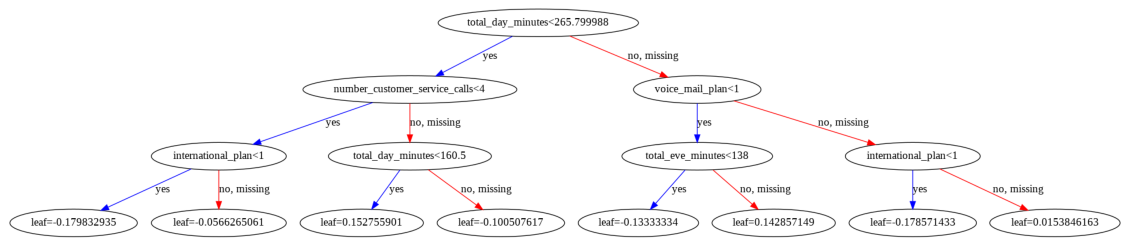

In [ ]:
fig, ax = plt.subplots(figsize=(20, 8))
xgb.plot_tree(clf_final,ax=ax)
plt.show()

Node di atas di-*split* berdasar 3 nilai, yaitu 'yes', 'no', dan 'missing'. Ini karena XGBoost menawarkan *handling missing values* sehingga *decision tree* juga akan membuatkan 'jalur' bagi *missing data* pada proses *learning*

# Test Data

Untuk melakukan prediksi terhadap data pada **test.csv**, diperlukan fungsi yang meng-*handle* transformasi kolom dan fitur data sehingga cocok dengan *input* yang diinginkan model ML yang telah dibuat.

In [ ]:
def model_feature(new_df):
  # drop unnecessary features
  new_df = new_df.drop(axis='columns',labels=['number_vmail_messages','total_day_charge', 'total_night_charge', 'total_eve_charge','total_intl_charge','area_code'])
  
  # change binary category format
  new_df['international_plan'] = new_df['international_plan'].apply(lambda x: 0 if x=='no' else 1)
  new_df['voice_mail_plan'] = new_df['voice_mail_plan'].apply(lambda x: 0 if x=='no' else 1)

  # binning 'state'
  lst_northeast = ['CT','ME','MA','NH','RI','VT','NJ','NY','PA']
  lst_midwest = ['IL','IN','MI','OH','WI','IO','KS','MN','MO','NE','ND','SD']
  lst_south = ['DE','FL','GA','MD','NC','SC','VA','DC','WV','AL','KY','MS','TN','AR','LA','OK','TX']
  lst_west = ['AZ','CO','ID','MT','NV','NM','UT','WY','AK','CA','HI','OR','WA']
  new_df['state'] = new_df['state'].apply(lambda x: 'Northeast' if x in lst_northeast else 'Midwest' if x in lst_midwest else 'South' if x in lst_south else 'West')

  # one hot encoding
  new_df = pd.get_dummies(new_df,prefix='state',
                          columns=['state'],
                          drop_first=True)
  return new_df

Sekarang baca data CSV yang ingin diprediksi dan jalankan fungsi `model_feature()` 

In [ ]:
unseen_df = pd.read_csv('test.csv').drop(axis='columns',labels=['id'])
unseen_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          750 non-null    object 
 1   account_length                 750 non-null    int64  
 2   area_code                      750 non-null    object 
 3   international_plan             750 non-null    object 
 4   voice_mail_plan                750 non-null    object 
 5   number_vmail_messages          750 non-null    int64  
 6   total_day_minutes              750 non-null    float64
 7   total_day_calls                750 non-null    int64  
 8   total_day_charge               750 non-null    float64
 9   total_eve_minutes              750 non-null    float64
 10  total_eve_calls                750 non-null    int64  
 11  total_eve_charge               750 non-null    float64
 12  total_night_minutes            750 non-null    flo

In [ ]:
input_df = model_feature(unseen_df)
input_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   account_length                 750 non-null    int64  
 1   international_plan             750 non-null    int64  
 2   voice_mail_plan                750 non-null    int64  
 3   total_day_minutes              750 non-null    float64
 4   total_day_calls                750 non-null    int64  
 5   total_eve_minutes              750 non-null    float64
 6   total_eve_calls                750 non-null    int64  
 7   total_night_minutes            750 non-null    float64
 8   total_night_calls              750 non-null    int64  
 9   total_intl_minutes             750 non-null    float64
 10  total_intl_calls               750 non-null    int64  
 11  number_customer_service_calls  750 non-null    int64  
 12  state_Northeast                750 non-null    uin

Sekarang kita bisa memprediksi label data dan menyimpan array-nya dalam CSV bila dibutuhkan

In [ ]:
output = clf_final.predict(input_df)
output

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
pd.DataFrame(output).to_csv('test_predict.csv',index=False,header=False)